* Create day of week column
* Sum count
* Create bar chart


In [21]:
# Import libraries
import pandas as pd
import seaborn as sns
import dateutil

In [22]:
csv_in = 'Resources/Crime_Data_from_2010_to_Present.csv'

In [23]:
# Optionally only read in first nrows
df = pd.read_csv(csv_in, encoding='utf8', parse_dates=['DATE OCC'])#,nrows=100000)
# Define date field
dt_field = 'DATE OCC'
# Convert column to date time
df[dt_field] = pd.to_datetime(df[dt_field])


## Create day fields by date occurred

In [24]:
# add day of week field
df['dayweek'] = df[dt_field].dt.day_name()
# day of week as number
df['day_of_week_in_number'] = df[dt_field].dt.dayofweek
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,dayweek,day_of_week_in_number
0,1307355,02/20/2010 12:00:00 AM,2010-02-20,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,Saturday,5
1,11401303,09/13/2010 12:00:00 AM,2010-09-12,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,Sunday,6
2,70309629,08/09/2010 12:00:00 AM,2010-08-09,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,Monday,0
3,90631215,01/05/2010 12:00:00 AM,2010-01-05,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,Tuesday,1
4,100100501,01/03/2010 12:00:00 AM,2010-01-02,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,Saturday,5


In [25]:
# Set int field to str
df['Crm Cd']=df['Crm Cd'].astype(str)
#(df['Crm Cd Desc'].str.contains('BURGLARY')))
# query values
query=((df[dt_field] >= '08-06-2018') & (df[dt_field] <= '08-05-2019')&
        (df['Crm Cd'].str.contains('310|320'))&
        (df['Premis Desc'].str.contains('SINGLE FAMILY|MULTI-UNIT')))
# Convert to expected value with loc
dfsel=df.loc[query]
# Check dates by sorting
dfsel=dfsel.drop(['Crm Cd 2', 'Crm Cd 3','Crm Cd 4', 'Rpt Dist No', 'DR_NO','Mocodes','Status','Status Desc', 'Cross Street','Crm Cd 1', 'Weapon Used Cd','Weapon Desc', 'TIME OCC', 'Vict Sex', 'Vict Descent', 'Premis Cd'], axis=1)
dfsel = dfsel.sort_values('DATE OCC', ascending=False)
dfsel.head()

,Date Rptd,DATE OCC,AREA,AREA NAME,Part 1-2,Crm Cd,Crm Cd Desc,Vict Age,Premis Desc,LOCATION,LAT,LON,dayweek,day_of_week_in_number
1998594,08/05/2019 12:00:00 AM,2019-08-05,14,Pacific,1,320,"BURGLARY, ATTEMPTED",0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",10400 IRENE ST,34.0302,-118.4112,Monday,0
1950045,08/05/2019 12:00:00 AM,2019-08-05,7,Wilshire,1,310,BURGLARY,52,SINGLE FAMILY DWELLING,700 N ALTA VISTA BL,34.0835,-118.3474,Monday,0
1909112,08/05/2019 12:00:00 AM,2019-08-05,3,Southwest,1,310,BURGLARY,72,SINGLE FAMILY DWELLING,1800 W 41ST ST,34.0099,-118.3113,Monday,0
1920574,08/04/2019 12:00:00 AM,2019-08-04,20,Olympic,1,310,BURGLARY,0,SINGLE FAMILY DWELLING,3300 COUNTRY CLUB DR,34.0494,-118.3145,Sunday,6
2019548,08/04/2019 12:00:00 AM,2019-08-04,7,Wilshire,1,310,BURGLARY,51,SINGLE FAMILY DWELLING,400 S MC CADDEN PL,34.0669,-118.3372,Sunday,6


In [26]:
df_total=dfsel.groupby(["day_of_week_in_number"])['Crm Cd Desc'].count().reset_index(name="total_count_burglary")
df_total.head(7)

,day_of_week_in_number,total_count_burglary
0,0,1157
1,1,1233
2,2,1337
3,3,1397
4,4,1404
5,5,944
6,6,842


### Plot the data



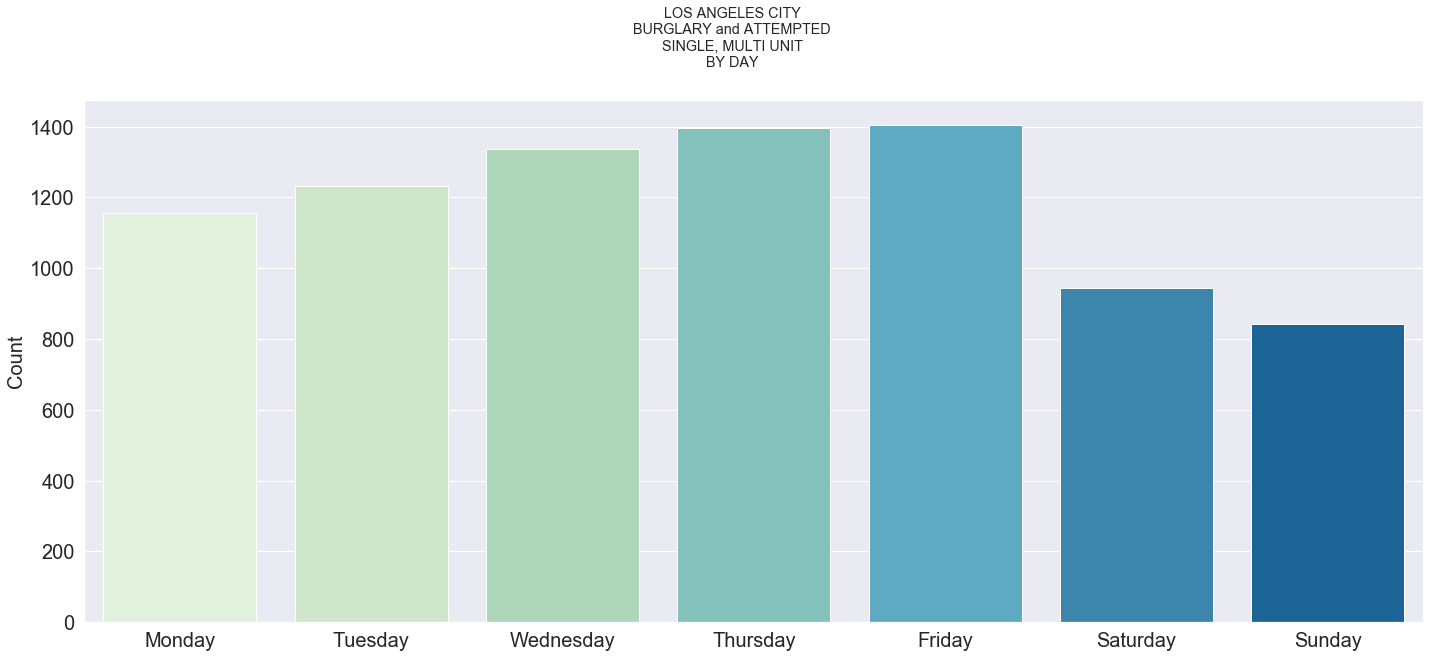

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context({"figure.figsize": (24, 10)})
topplot=sns.barplot(x='day_of_week_in_number',y='total_count_burglary', data = df_total,palette="GnBu")
#sns.barplot(x = compdf.day_of_week_in_number, y = compdf.total_count)
#Plot 2 - overlay - "bottom" series
#bottom_plot = sns.barplot(x = compdf.day_of_week_in_number, y = compdf.total_count_homicide, color = "#0000A3")
#plt.legend(title='Smoker', loc='best', labels=['Hell Yeh', 'Nah Bruh'])
topbar = plt.Rectangle((0,0),1,1,fc="#0000A3", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#FF6633',  edgecolor = 'none')

# Set up labels
topplot.set_ylabel("Count")
topplot.set_xlabel("")
topplot.set_xticklabels(('Monday', 'Tuesday',"Wednesday", 'Thursday', 'Friday', 'Saturday', 'Sunday'))
#Set fonts to consistent 20pt size
for item in ([topplot.xaxis.label, topplot.yaxis.label] +
             topplot.get_xticklabels() + topplot.get_yticklabels()):
    item.set_fontsize(20)
# Use seaborn default for plot
sns.set()
plt.subplots_adjust(top=0.85)
plt.suptitle('LOS ANGELES CITY\nBURGLARY and ATTEMPTED\nSINGLE, MULTI UNIT\nBY DAY')

plt.savefig('./output/burglary.png', format='png')


In [36]:
df_total=dfsel.groupby(["DATE OCC"])['Crm Cd Desc'].count().reset_index(name="total_count_burglary")
# sort values, 
#df_total.sort_values('total_count_burglary', ascending=False, inplace=True)
df_total.head()

,DATE OCC,total_count_burglary
0,2018-08-06,23
1,2018-08-07,31
2,2018-08-08,34
3,2018-08-09,34
4,2018-08-10,33


In [29]:
df_total.describe()

,total_count_burglary
count,365.000000
mean,22.778082
std,7.470643
min,3.000000
25%,18.000000
50%,22.000000
75%,28.000000
max,61.000000


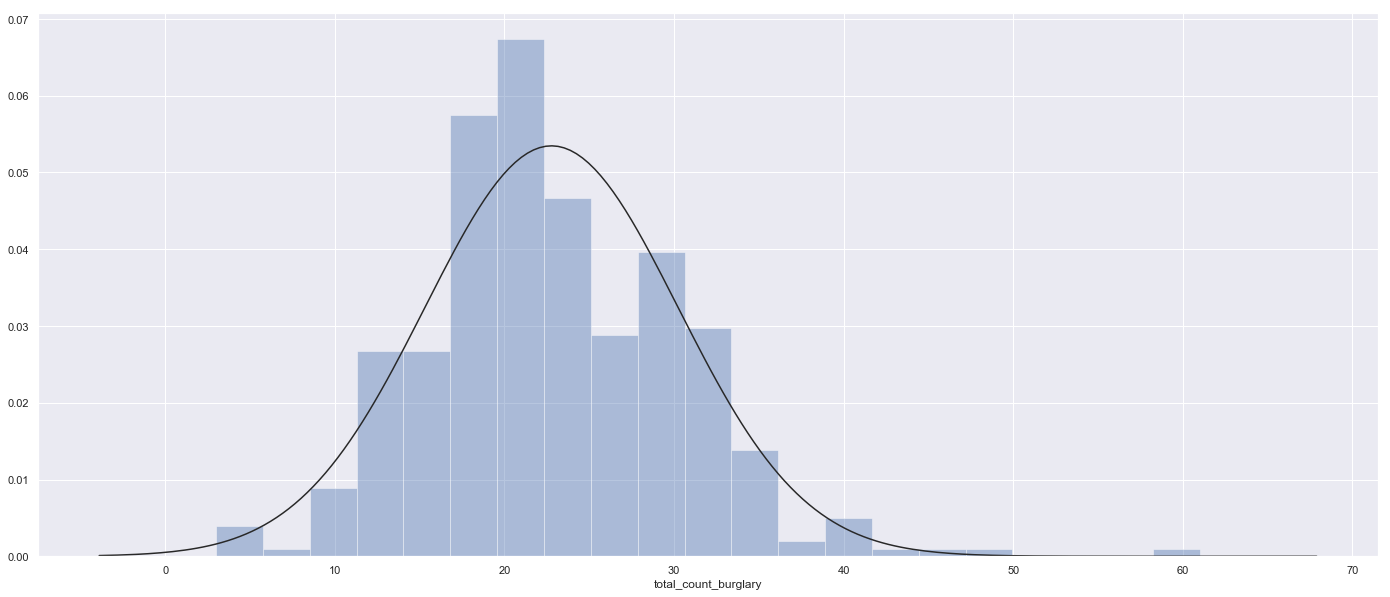

In [30]:
# Control the number of bins
from scipy.stats import norm
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
# https://seaborn.pydata.org/generated/seaborn.distplot.html
# d
sns.distplot( df_total["total_count_burglary"],fit=norm, kde=False)
#Set font size
sns.set(font_scale=1.7)


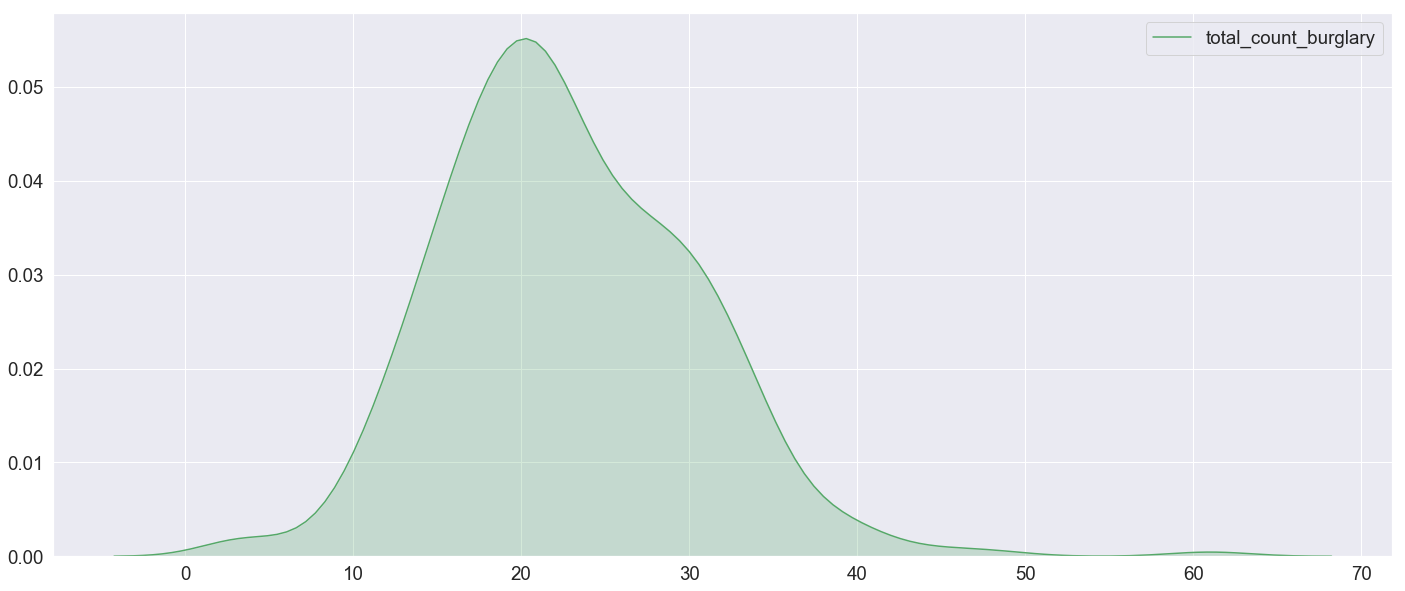

In [31]:
sns.kdeplot( df_total["total_count_burglary"], shade=True, color="g")